In [1]:
import os
import tensorflow.keras as keras
import itertools

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.layers import Dropout

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.2

In [8]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0     

50000/50000 [==============================] - 1s 17us/sample - loss: 1.4543 - accuracy: 0.4800 - val_loss: 1.4045 - val_accuracy: 0.4940
Epoch 43/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.4481 - accuracy: 0.4804 - val_loss: 1.4021 - val_accuracy: 0.5002
Epoch 44/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.4475 - accuracy: 0.4829 - val_loss: 1.3972 - val_accuracy: 0.5022
Epoch 45/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.4386 - accuracy: 0.4854 - val_loss: 1.3937 - val_accuracy: 0.5034
Epoch 46/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.4327 - accuracy: 0.4906 - val_loss: 1.3845 - val_accuracy: 0.5069
Epoch 47/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.4253 - accuracy: 0.4916 - val_loss: 1.3911 - val_accuracy: 0.5038
Epoch 48/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.4229 - accuracy: 0.4915 - va

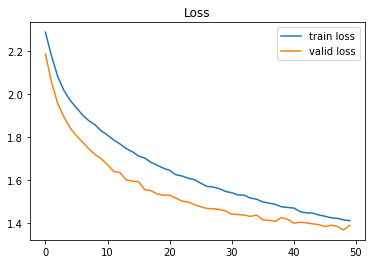

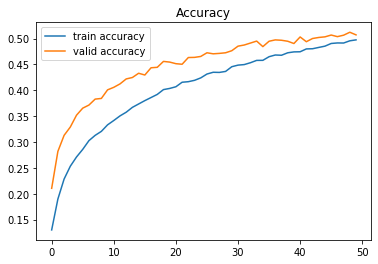

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# Adam

In [11]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = 0.1

In [12]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 1s 17us/sample - loss: 1.2891 - accuracy: 0.5408 - val_loss: 1.3633 - val_accuracy: 0.5186
Epoch 43/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.2834 - accuracy: 0.5424 - val_loss: 1.3698 - val_accuracy: 0.5129
Epoch 44/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.2773 - accuracy: 0.5448 - val_loss: 1.3976 - val_accuracy: 0.5075
Epoch 45/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.2808 - accuracy: 0.5446 - val_loss: 1.3614 - val_accuracy: 0.5162
Epoch 46/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.2670 - accuracy: 0.5498 - val_loss: 1.3652 - val_accuracy: 0.5226
Epoch 47/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.2676 - accuracy: 0.5488 - val_loss: 1.3589 - val_accuracy: 0.5168
Epoch 48/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.2586 - accuracy: 0.5518 - va

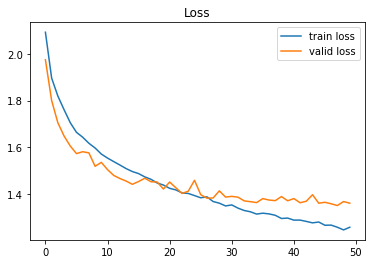

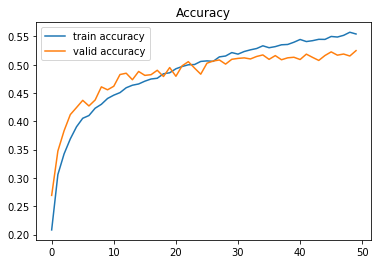

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()